<a href="https://colab.research.google.com/github/Adarsh7447/PandasProject/blob/main/feature_engineering_assignment_adarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Feature Engineering

* Load the census dataset shared from the '/data' directory.
* Perform the basic cleaning, lookout for the data quality issues.
* Apply feature aggregation (think about combining information from multiple features into a single feature)
* Handle missing values
* Identify and treat outliers
* Perform the binning for Hours Per Week
* Apply the categorical variable encoding technique
* Apply feature scaling

NOTE: After processing, all the features should be in the form of numbers.

## About Dataset

![image.png](attachment:09f55ed2-31f6-4973-a872-178f309aaa43.png)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from feature_engine.encoding import *
from feature_engine.outliers import *
from feature_engine.discretisation import *

In [13]:
df = pd.read_csv('/content/adults_census_data.csv')
df.head()

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516.0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48843 non-null  object 
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Martial_Status  48842 non-null  object 
 5   Occupation      46033 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital_Gain    48842 non-null  float64
 10  Capital_Loss    48842 non-null  float64
 11  Hours_per_week  48842 non-null  float64
 12  Country         47985 non-null  object 
 13  Target          48842 non-null  object 
dtypes: float64(4), object(10)
memory usage: 5.2+ MB


In [15]:
df.shape

(48843, 14)

In [23]:
df.isnull().sum()

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Martial_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            857
Target               0
dtype: int64

In [17]:
df['Age'].unique()

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '57', '44', '41', '29', '18',
       '47', '46', '36', '79', '27', '67', '33', '76', '17', '55', '61',
       '70', '64', '71', '68', '66', '51', '58', '26', '60', '90', '75',
       '65', '77', '62', '63', '80', '72', '74', '69', '73', '81', '78',
       '88', '82', '83', '84', '85', '86', '87', '|1x3 Cross validator',
       '89'], dtype=object)

In [18]:
df = df[df['Age'] != '|1x3 Cross validator']

In [21]:
df['Age'] = df['Age'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48842 non-null  int64  
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Martial_Status  48842 non-null  object 
 5   Occupation      46033 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital_Gain    48842 non-null  float64
 10  Capital_Loss    48842 non-null  float64
 11  Hours_per_week  48842 non-null  float64
 12  Country         47985 non-null  object 
 13  Target          48842 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.6+ MB


In [24]:
df['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [25]:
df.loc[df['Workclass'].isna()]

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
27,54,NaN,180211.0,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
61,32,NaN,293936.0,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,<=50K
69,25,NaN,200681.0,Some-college,Never-married,NaN,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
77,67,NaN,212759.0,10th,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,2.0,United-States,<=50K
106,17,NaN,304873.0,10th,Never-married,NaN,Own-child,White,Female,34095.0,0.0,32.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48683,61,NaN,265201.0,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,14.0,United-States,<=50K.
48770,21,NaN,212661.0,Some-college,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
48801,73,NaN,144872.0,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,Canada,<=50K.
48813,81,NaN,26711.0,Assoc-voc,Married-civ-spouse,NaN,Husband,White,Male,2936.0,0.0,20.0,United-States,<=50K.


In [32]:
df = df.drop(df.loc[(df['Workclass'].isna()) & (df['Occupation'].isna())].index)


In [33]:
df.isnull().sum()

Age                 0
Workclass           0
fnlwgt              0
Education           0
Martial_Status      0
Occupation         10
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           811
Target              0
dtype: int64

In [34]:
df['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [35]:
df['Country'].value_counts()

Country
United-States                 41302
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador             

In [36]:
df = df.drop(df.loc[(df['Country'].isna()) | (df['Occupation'].isna())].index)


In [37]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [38]:
df.shape

(45222, 14)

In [40]:
a = df.columns.tolist()
a

['Age',
 'Workclass',
 'fnlwgt',
 'Education',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Country',
 'Target']

In [41]:
df['Net_Capital_Gain'] = df['Capital_Gain'] - df['Capital_Loss']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               45222 non-null  int64  
 1   Workclass         45222 non-null  object 
 2   fnlwgt            45222 non-null  float64
 3   Education         45222 non-null  object 
 4   Martial_Status    45222 non-null  object 
 5   Occupation        45222 non-null  object 
 6   Relationship      45222 non-null  object 
 7   Race              45222 non-null  object 
 8   Sex               45222 non-null  object 
 9   Capital_Gain      45222 non-null  float64
 10  Capital_Loss      45222 non-null  float64
 11  Hours_per_week    45222 non-null  float64
 12  Country           45222 non-null  object 
 13  Target            45222 non-null  object 
 14  Net_Capital_Gain  45222 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 5.5+ MB


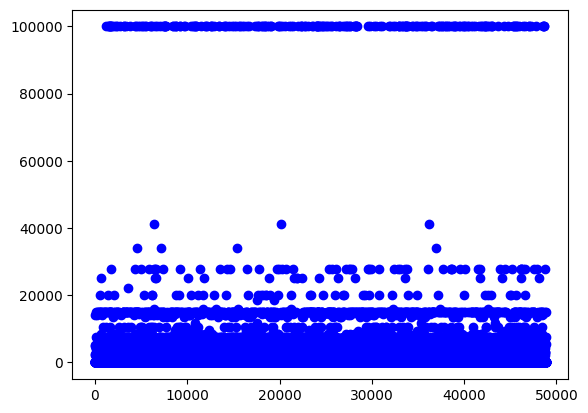

In [48]:
plt.scatter(df.index, df['Capital_Gain'], color='blue', label='Data Points')


In [45]:
df['Workclass'].value_counts()

Workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

In [49]:
df[df['Capital_Gain']>=80000]

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target,Net_Capital_Gain
1246,54,Self-emp-inc,166459.0,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K,99999.0
1368,52,Private,152234.0,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999.0,0.0,40.0,Japan,>50K,99999.0
1482,53,Self-emp-inc,263925.0,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,99999.0
1528,52,Private,118025.0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,50.0,United-States,>50K,99999.0
1616,46,Private,370119.0,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47740,32,Self-emp-inc,225053.0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K.,99999.0
48583,61,Self-emp-not-inc,151369.0,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,30.0,United-States,>50K.,99999.0
48592,36,Private,224566.0,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,99999.0,0.0,45.0,United-States,>50K.,99999.0
48599,42,Private,32878.0,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,42.0,United-States,>50K.,99999.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               45222 non-null  int64  
 1   Workclass         45222 non-null  object 
 2   fnlwgt            45222 non-null  float64
 3   Education         45222 non-null  object 
 4   Martial_Status    45222 non-null  object 
 5   Occupation        45222 non-null  object 
 6   Relationship      45222 non-null  object 
 7   Race              45222 non-null  object 
 8   Sex               45222 non-null  object 
 9   Capital_Gain      45222 non-null  float64
 10  Capital_Loss      45222 non-null  float64
 11  Hours_per_week    45222 non-null  float64
 12  Country           45222 non-null  object 
 13  Target            45222 non-null  object 
 14  Net_Capital_Gain  45222 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 6.5+ MB


In [51]:
X = df.drop(columns=['Target'])  # Features (excluding the target column)
y = df['Target']                 # Target variable


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
X_train.shape, X_test.shape

((36177, 14), (9045, 14))

In [57]:
X_train.head()

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Net_Capital_Gain
8624,32,Private,282611.0,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0
28487,45,Private,192323.0,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,66.0,Yugoslavia,0.0
33914,45,Self-emp-not-inc,144086.0,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
14435,39,Self-emp-inc,168355.0,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,70.0,United-States,0.0
41845,51,State-gov,187686.0,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,38.0,United-States,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


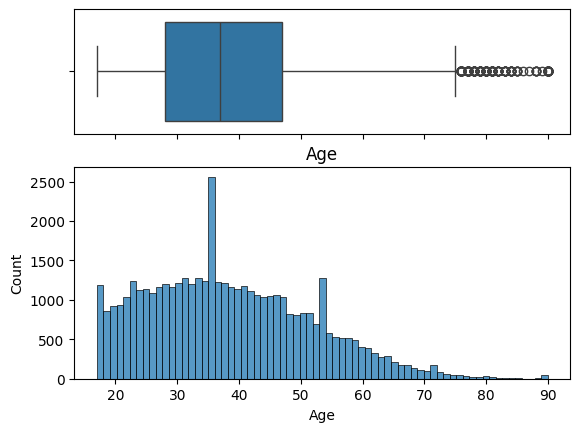

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


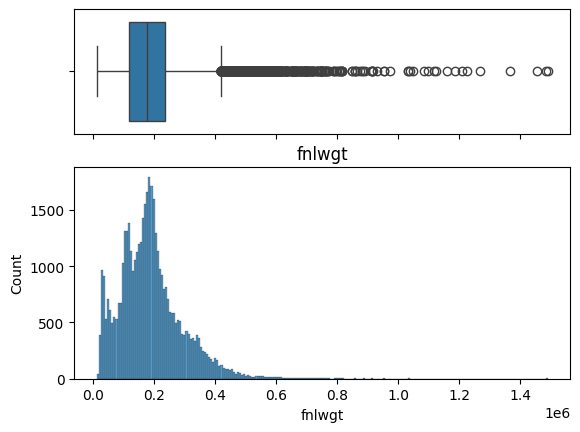

In [61]:
def plot_boxplot_and_hist(data, variable):

    # creating a figure composed of two matplotlib.Axes
    # objects (ax_box and ax_hist)

    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

plot_boxplot_and_hist(df,'Age')
plot_boxplot_and_hist(df,'fnlwgt')

In [65]:
trimmer = OutlierTrimmer(
    variables=['Age','fnlwgt'],
    capping_method='iqr',
    tail='both',
    fold=1.5,
)
trimmer.fit(X_train)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['Age', 'fnlwgt'])

In [67]:
trimmer.left_tail_caps_

{'Age': -0.5, 'fnlwgt': -63388.5}

In [68]:
trimmer.right_tail_caps_

{'Age': 75.5, 'fnlwgt': 418639.5}

In [70]:
print(X_train.shape, X_test.shape)
X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)
print(X_train_enc.shape, X_test_enc.shape)

(36177, 14) (9045, 14)
(34877, 14) (8744, 14)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


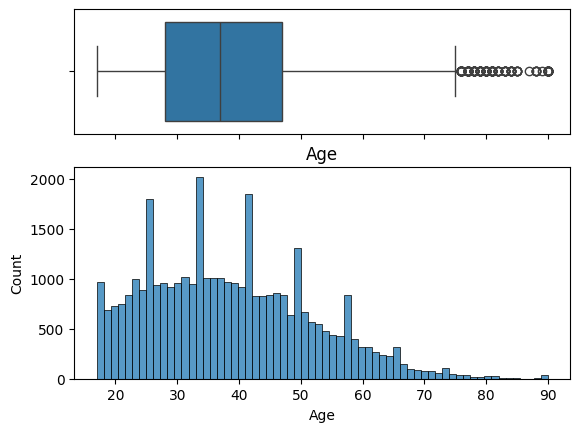

In [71]:
plot_boxplot_and_hist(X_train,'Age')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


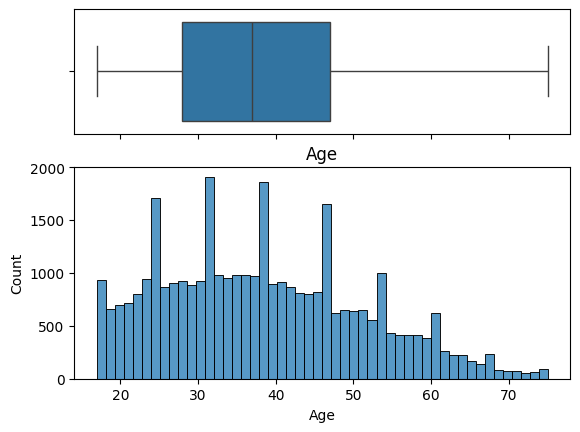

In [72]:
plot_boxplot_and_hist(X_train_enc, 'Age')

In [74]:
trimmer = OutlierTrimmer(
    variables=['Age', 'fnlwgt'],
    capping_method='gaussian',
    tail='both',
    fold=3,
)
trimmer.fit(X_train)

OutlierTrimmer(fold=3, tail='both', variables=['Age', 'fnlwgt'])

In [75]:
trimmer.left_tail_caps_

{'Age': -1.1397836370962224, 'fnlwgt': -127655.21275620727}

In [76]:
trimmer.right_tail_caps_

{'Age': 78.25634941093043, 'fnlwgt': 507175.14917990187}

In [77]:
print(X_train.shape,X_test.shape)
X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)
print(X_train_enc.shape, X_test_enc.shape)

(36177, 14) (9045, 14)
(35674, 14) (8918, 14)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


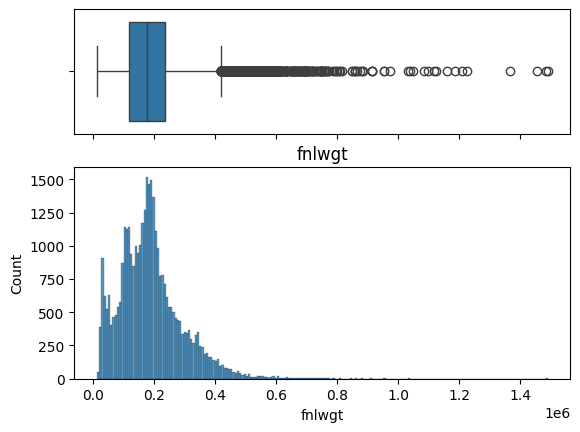

In [78]:
#before trimming

plot_boxplot_and_hist(X_train, 'fnlwgt')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


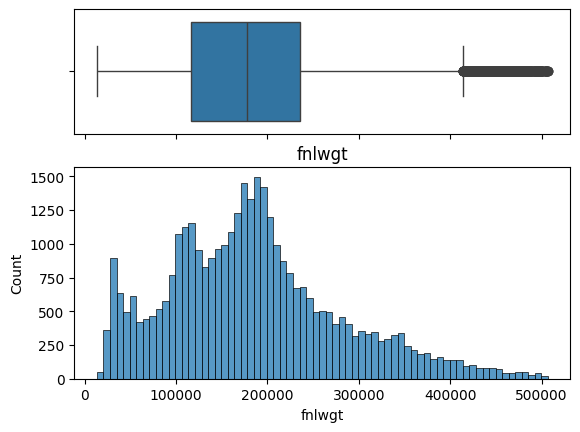

In [79]:
# After trimming

plot_boxplot_and_hist(X_train_enc, 'fnlwgt')

In [90]:
capper = Winsorizer(
    variables=['Age','fnlwgt'],
    capping_method='iqr',
    tail='both',
    fold=1.5,
)
capper.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Age', 'fnlwgt'])

In [91]:
capper.left_tail_caps_

{'Age': -0.5, 'fnlwgt': -63388.5}

In [92]:
capper.right_tail_caps_

{'Age': 75.5, 'fnlwgt': 418639.5}

In [93]:
X_train_tr = capper.transform(X_train)
X_test_tr = capper.transform(X_test)
X_train_tr[capper.variables_].max()

Age           75.5
fnlwgt    418639.5
dtype: float64

In [94]:
X_train_tr[capper.variables_].min()

Age          17.0
fnlwgt    13492.0
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


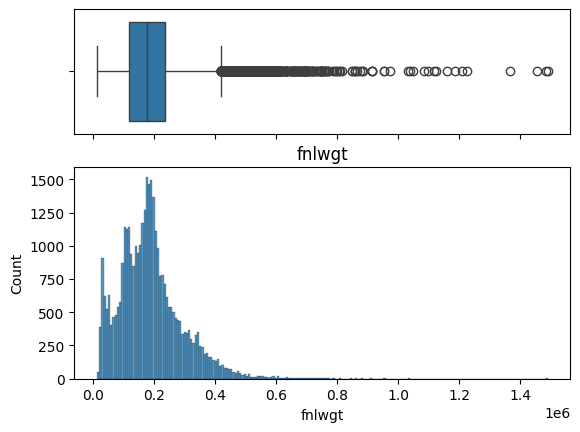

In [95]:
# before capping

plot_boxplot_and_hist(X_train, 'fnlwgt')


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


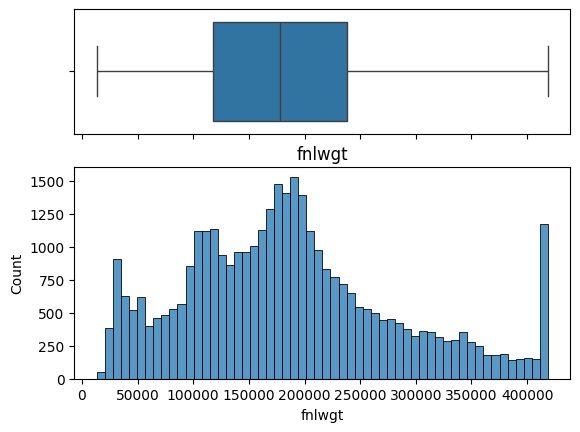

In [96]:
# after capping

plot_boxplot_and_hist(X_train_tr,'fnlwgt')

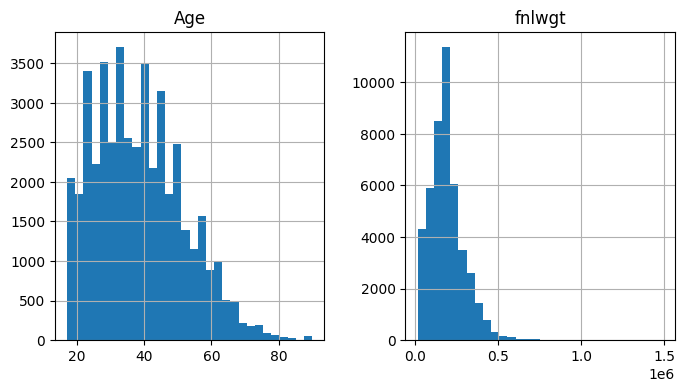

In [98]:
df[['Age','fnlwgt']].hist(bins=30, figsize=(8,4))
plt.show()

In [99]:
disc = EqualWidthDiscretiser(bins=8, variables=['Age','fnlwgt'])
disc.fit(X_train)

EqualWidthDiscretiser(bins=8, variables=['Age', 'fnlwgt'])

In [100]:
disc.binner_dict_

{'Age': [-inf, 26.125, 35.25, 44.375, 53.5, 62.625, 71.75, 80.875, inf],
 'fnlwgt': [-inf,
  198105.5,
  382719.0,
  567332.5,
  751946.0,
  936559.5,
  1121173.0,
  1305786.5,
  inf]}

In [101]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [102]:
train_t.head()

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Net_Capital_Gain
8624,1,Private,1,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0
28487,3,Private,0,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,66.0,Yugoslavia,0.0
33914,3,Self-emp-not-inc,0,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
14435,2,Self-emp-inc,0,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,70.0,United-States,0.0
41845,3,State-gov,0,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,38.0,United-States,0.0


Text(0, 0.5, 'Number of observations per bin')

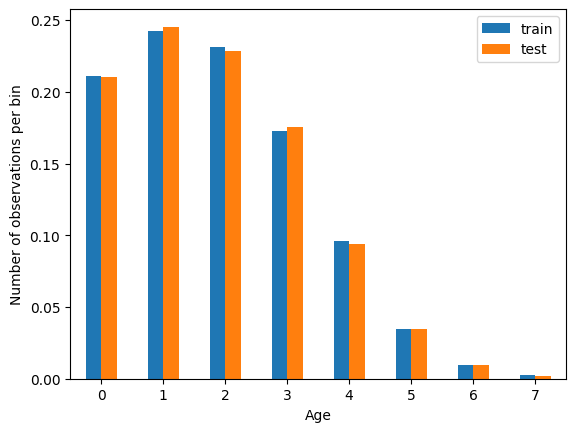

In [107]:
t1 = train_t['Age'].value_counts(normalize=True).sort_index()
t2 = test_t['Age'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1,t2], axis=1)
tmp.columns = ['train','test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

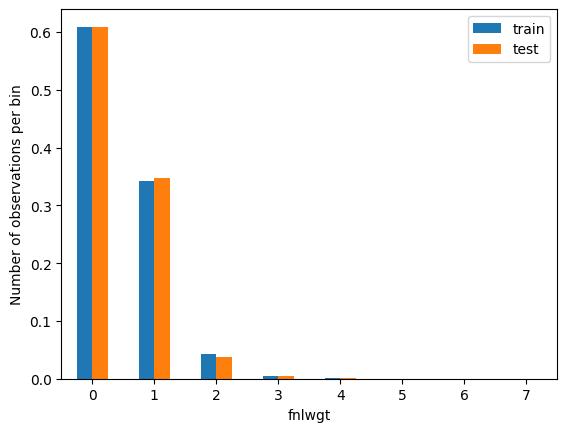

In [108]:
t1 = train_t['fnlwgt'].value_counts(normalize=True).sort_index()
t2 = test_t['fnlwgt'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1,t2], axis=1)
tmp.columns = ['train','test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [109]:
encoder = OneHotEncoder(
    variables=None,
    drop_last=True,
)

In [110]:
encoder.fit(X_train)

OneHotEncoder(drop_last=True)

In [111]:
encoder.variables_

['Workclass',
 'Education',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Country']

In [112]:
encoder.encoder_dict_

{'Workclass': [' Private',
  ' Self-emp-not-inc',
  ' Self-emp-inc',
  ' State-gov',
  ' Local-gov',
  ' Federal-gov'],
 'Education': [' Bachelors',
  ' Assoc-acdm',
  ' 11th',
  ' HS-grad',
  ' 9th',
  ' Some-college',
  ' 7th-8th',
  ' Masters',
  ' Assoc-voc',
  ' 10th',
  ' 5th-6th',
  ' 1st-4th',
  ' Doctorate',
  ' Preschool',
  ' 12th'],
 'Martial_Status': [' Never-married',
  ' Married-civ-spouse',
  ' Divorced',
  ' Separated',
  ' Widowed',
  ' Married-spouse-absent'],
 'Occupation': [' Exec-managerial',
  ' Craft-repair',
  ' Adm-clerical',
  ' Other-service',
  ' Machine-op-inspct',
  ' Sales',
  ' Prof-specialty',
  ' Tech-support',
  ' Handlers-cleaners',
  ' Transport-moving',
  ' Farming-fishing',
  ' Priv-house-serv',
  ' Protective-serv'],
 'Relationship': [' Not-in-family',
  ' Husband',
  ' Unmarried',
  ' Other-relative',
  ' Own-child'],
 'Race': [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo'],
 'Sex': [' Female'],
 'Country': [' United-States',

In [113]:
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)
X_train_enc.head()

,Age,fnlwgt,Capital_Gain,Capital_Loss,Hours_per_week,Net_Capital_Gain,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Self-emp-inc,Workclass_ State-gov,...,Country_ Laos,Country_ Haiti,Country_ Poland,Country_ Taiwan,Country_ Scotland,Country_ Ireland,Country_ France,Country_ Greece,Country_ Hungary,Country_ Holand-Netherlands
8624,32,282611.0,0.0,0.0,40.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28487,45,192323.0,0.0,0.0,66.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33914,45,144086.0,0.0,0.0,50.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14435,39,168355.0,0.0,0.0,70.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41845,51,187686.0,0.0,0.0,38.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
encoder.get_feature_names_out()

['Age',
 'fnlwgt',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Net_Capital_Gain',
 'Workclass_ Private',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ Self-emp-inc',
 'Workclass_ State-gov',
 'Workclass_ Local-gov',
 'Workclass_ Federal-gov',
 'Education_ Bachelors',
 'Education_ Assoc-acdm',
 'Education_ 11th',
 'Education_ HS-grad',
 'Education_ 9th',
 'Education_ Some-college',
 'Education_ 7th-8th',
 'Education_ Masters',
 'Education_ Assoc-voc',
 'Education_ 10th',
 'Education_ 5th-6th',
 'Education_ 1st-4th',
 'Education_ Doctorate',
 'Education_ Preschool',
 'Education_ 12th',
 'Martial_Status_ Never-married',
 'Martial_Status_ Married-civ-spouse',
 'Martial_Status_ Divorced',
 'Martial_Status_ Separated',
 'Martial_Status_ Widowed',
 'Martial_Status_ Married-spouse-absent',
 'Occupation_ Exec-managerial',
 'Occupation_ Craft-repair',
 'Occupation_ Adm-clerical',
 'Occupation_ Other-service',
 'Occupation_ Machine-op-inspct',
 'Occupation_ Sales',
 'Occupation_ Prof-sp

In [115]:
df['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [117]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=None,
)

In [118]:
ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary')

In [119]:
ordinal_enc.encoder_dict_

{'Workclass': {' Private': 0,
  ' Self-emp-not-inc': 1,
  ' Self-emp-inc': 2,
  ' State-gov': 3,
  ' Local-gov': 4,
  ' Federal-gov': 5,
  ' Without-pay': 6},
 'Education': {' Bachelors': 0,
  ' Assoc-acdm': 1,
  ' 11th': 2,
  ' HS-grad': 3,
  ' 9th': 4,
  ' Some-college': 5,
  ' 7th-8th': 6,
  ' Masters': 7,
  ' Assoc-voc': 8,
  ' 10th': 9,
  ' 5th-6th': 10,
  ' 1st-4th': 11,
  ' Doctorate': 12,
  ' Preschool': 13,
  ' 12th': 14,
  ' Prof-school': 15},
 'Martial_Status': {' Never-married': 0,
  ' Married-civ-spouse': 1,
  ' Divorced': 2,
  ' Separated': 3,
  ' Widowed': 4,
  ' Married-spouse-absent': 5,
  ' Married-AF-spouse': 6},
 'Occupation': {' Exec-managerial': 0,
  ' Craft-repair': 1,
  ' Adm-clerical': 2,
  ' Other-service': 3,
  ' Machine-op-inspct': 4,
  ' Sales': 5,
  ' Prof-specialty': 6,
  ' Tech-support': 7,
  ' Handlers-cleaners': 8,
  ' Transport-moving': 9,
  ' Farming-fishing': 10,
  ' Priv-house-serv': 11,
  ' Protective-serv': 12,
  ' Armed-Forces': 13},
 'Relations

In [120]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)
X_train.head()

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Net_Capital_Gain
8624,32,0,282611.0,0,0,0,0,0,0,0.0,0.0,40.0,0,0.0
28487,45,0,192323.0,1,1,1,1,0,1,0.0,0.0,66.0,1,0.0
33914,45,1,144086.0,2,1,1,1,0,1,0.0,0.0,50.0,0,0.0
14435,39,2,168355.0,3,1,0,1,0,1,0.0,0.0,70.0,0,0.0
41845,51,3,187686.0,3,2,2,0,0,0,0.0,0.0,38.0,0,0.0


In [122]:
X_train.describe().round()

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Net_Capital_Gain
count,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0,36177.0
mean,39.0,1.0,189760.0,4.0,1.0,4.0,2.0,0.0,1.0,1089.0,87.0,41.0,1.0,1002.0
std,13.0,1.0,105807.0,3.0,1.0,3.0,1.0,1.0,0.0,7520.0,402.0,12.0,5.0,7543.0
min,17.0,0.0,13492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-4356.0
25%,28.0,0.0,117372.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0
50%,37.0,0.0,178215.0,3.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,40.0,0.0,0.0
75%,47.0,1.0,237879.0,5.0,1.0,6.0,2.0,0.0,1.0,0.0,0.0,45.0,0.0,0.0
max,90.0,6.0,1490400.0,15.0,6.0,13.0,5.0,4.0,1.0,99999.0,4356.0,99.0,40.0,99999.0


In [126]:
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train)

X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
scaler.scale_

array([1.32326888e+01, 1.40828709e+00, 1.05805060e+05, 3.23725742e+00,
       1.02872589e+00, 3.11177260e+00, 1.49954256e+00, 6.12711572e-01,
       4.67829810e-01, 7.51976719e+03, 4.01689861e+02, 1.19882358e+01,
       4.92024195e+00, 7.54308931e+03])

In [129]:
X_trained_scaled.describe().round(2)

,Age,Workclass,fnlwgt,Education,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Net_Capital_Gain
count,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00,36177.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.63,-0.51,-1.67,-1.26,-0.99,-1.30,-1.02,-0.34,-1.45,-0.14,-0.22,-3.33,-0.24,-0.71
25%,-0.80,-0.51,-0.68,-0.33,-0.99,-0.98,-1.02,-0.34,-1.45,-0.14,-0.22,-0.08,-0.24,-0.13
50%,-0.12,-0.51,-0.11,-0.33,-0.02,-0.01,-0.35,-0.34,0.69,-0.14,-0.22,-0.08,-0.24,-0.13
75%,0.64,0.20,0.45,0.28,-0.02,0.63,0.31,-0.34,0.69,-0.14,-0.22,0.34,-0.24,-0.13
max,3.89,3.75,12.29,3.37,4.84,2.88,2.31,6.19,0.69,13.15,10.63,4.84,7.89,13.12


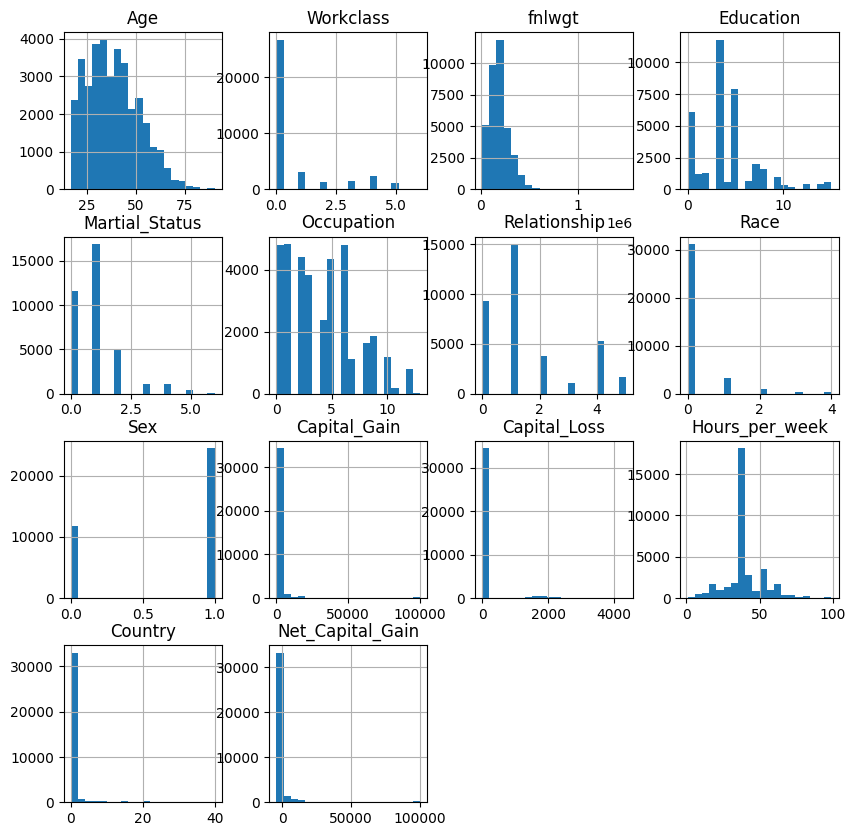

In [130]:
X_train.hist(bins=20,figsize=(10,10))
plt.show()

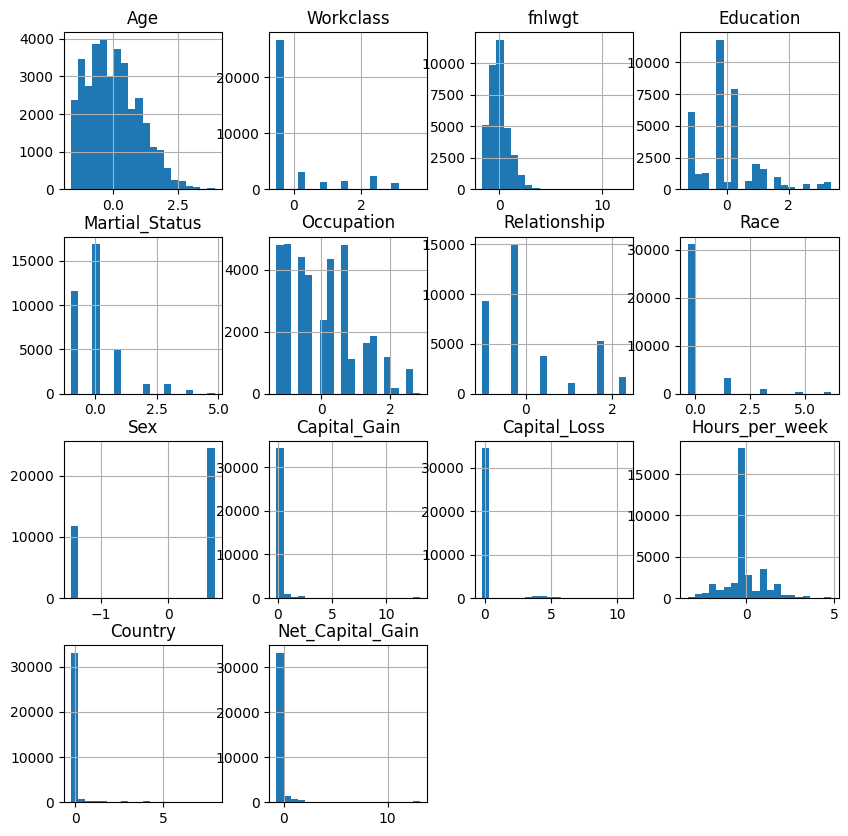

In [132]:
X_trained_scaled.hist(bins=20, figsize=(10,10))
plt.show()

# Write-Up

* Please mention your understanding on all the data quality issues observed
* Provide your rationale on applying the different methods for missing values imputation, outliers treatment, binning, encoding and scaling. (Which technique you used? and Why?)